In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [100]:
def myMAD(x):
    med = np.median(x)
    x   = abs(x-med)
    MAD = np.median(x)
    return MAD

In [101]:
df1 = pd.read_csv('Android/results/performances_nexus5.csv')
df1['smartphone'] = 'nexus5'
df2 = pd.read_csv('Android/results/performances_nexus6.csv')
df2['smartphone'] = 'nexus6'
df3 = pd.read_csv('Android/results/performances_s9.csv')
df3['smartphone'] = 'S9 plus'
df4 = pd.read_csv('Android/results/performances_xiaomi.csv')
df4['smartphone'] = 'Mi9T'

df = pd.concat([df1, df2, df3, df4])
df.pop('warmup')

0     36.1023
1     35.6087
2     36.5127
3     37.2153
4     37.2647
       ...   
25    19.6248
26    19.8854
27    19.7889
28    19.9342
29    19.7814
Name: warmup, Length: 118, dtype: float64

In [102]:
means = df.groupby([df.smartphone, df.model]).median().unstack()
errors = df.groupby([df.smartphone, df.model]).std().unstack()

In [103]:
means = means.reindex(columns=['neumf', 'ecam neumf', 'mobile'], level='model')

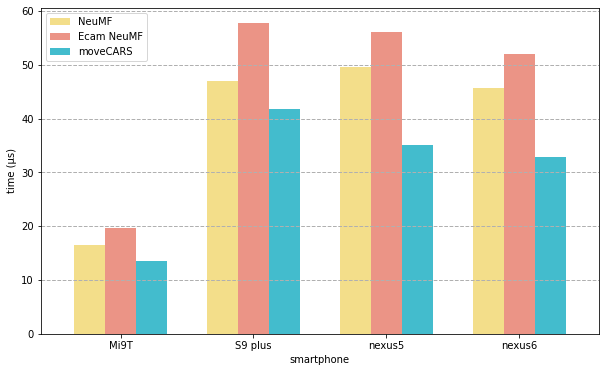

In [110]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

plot = means['inference'].plot(kind= 'bar',
                     color=['#F3DE8A', '#EB9486','#43BCCD'],
                     rot=0,  # don't rotate model names
                     ylabel='time (μs)',
                     #yerr=errors['init'], # errors bar
                     capsize=6, # error cap size
                     width=0.7,
                     ax=ax)

ax.grid(axis = 'y', linestyle = '--', linewidth = 1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['NeuMF', 'Ecam NeuMF', 'moveCARS']) # rename legend
plt.savefig('inference_tflite.pdf', format='pdf', bbox_inches='tight')
plt.show()